In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
f = open(r"D:\abuzar study material\pandas\WhatsApp Chat with abdul.txt", 'r', encoding='utf-8')

In [3]:
data = f.read()

In [4]:
pattern = r"\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}\u202f[ap]m"

In [5]:
chat = re.split(pattern,data)[1:]

In [6]:
chat

[' - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 ' - AbuZar: https://www.instagram.com/reel/CwpR-gPMv9S/?igshid=MTNhN2IzZGNmYg==\n',
 ' - AbuZar: https://youtube.com/shorts/SbyrlQy53yY?si=GDhWhOK2eJbOEtvi\n',
 ' - AbuZar: https://youtube.com/shorts/yYu23hOmyAI?si=JghsO-5E3vcKyOXW\n',
 ' - AbuZar: https://youtube.com/shorts/tHI0hX50Wss?si=nTfH9hJ8zk_lTm_3\n',
 ' - abdul: Haaaaah\n',
 ' - abdul: 🤣🤣🤣\n',
 ' - AbuZar: <Media omitted>\n',
 ' - AbuZar: https://youtube.com/shorts/JIESg9yN20g?si=UFX5A09LQn5OtLS4\n',
 ' - abdul: Dekh le bete\n',
 ' - AbuZar: Hmm Hafiz je\n',
 ' - AbuZar: Hai pakka\n',
 ' - abdul: 😁😁\n',
 ' - abdul: Kari Abdullaha fail h\n',
 ' - AbuZar: 😂😂\n',
 ' - AbuZar: https://youtube.com/shorts/V-KLPGr_huY?si=q3BOhlFXMcaaN1Rt\n',
 ' - AbuZar: 😂😂\n',
 ' - abdul: 😆😆😆😆\n',
 ' - AbuZar: https://youtube.com/shorts/zXR0_TCLN-o?si=GmawPXENPQ4Rh7IO\n',
 ' - AbuZar: https://youtube.

In [7]:
dates = re.findall(pattern, data)


In [8]:
date = []
for i in dates:
    date.append(i.split(',')[0])

In [9]:
name = []
for i in chat:
    name.append(i.split(':')[0])

In [10]:
df = pd.DataFrame({'Name': name,'Date': date, 'Chat': chat})
df.head(10)

,Name,Date,Chat
0,- Messages and calls are end-to-end encrypted...,11/10/23,- Messages and calls are end-to-end encrypted...
1,- AbuZar,11/10/23,- AbuZar: https://www.instagram.com/reel/CwpR...
2,- AbuZar,17/10/23,- AbuZar: https://youtube.com/shorts/SbyrlQy5...
3,- AbuZar,21/10/23,- AbuZar: https://youtube.com/shorts/yYu23hOm...
4,- AbuZar,25/10/23,- AbuZar: https://youtube.com/shorts/tHI0hX50...
5,- abdul,25/10/23,- abdul: Haaaaah\n
6,- abdul,25/10/23,- abdul: 🤣🤣🤣\n
7,- AbuZar,26/10/23,- AbuZar: <Media omitted>\n
8,- AbuZar,26/10/23,- AbuZar: https://youtube.com/shorts/JIESg9yN...
9,- abdul,26/10/23,- abdul: Dekh le bete\n


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Gul\AppData\Local\Temp\ipykernel_9080\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Year"] = df["Date"].dt.year

In [13]:
df.drop(0,inplace=True)

In [14]:
df.reset_index()

,index,Name,Date,Chat,Month,Day,Year
0,1,- AbuZar,2023-11-10,- AbuZar: https://www.instagram.com/reel/CwpR...,11,10,2023
1,2,- AbuZar,2023-10-17,- AbuZar: https://youtube.com/shorts/SbyrlQy5...,10,17,2023
2,3,- AbuZar,2023-10-21,- AbuZar: https://youtube.com/shorts/yYu23hOm...,10,21,2023
3,4,- AbuZar,2023-10-25,- AbuZar: https://youtube.com/shorts/tHI0hX50...,10,25,2023
4,5,- abdul,2023-10-25,- abdul: Haaaaah\n,10,25,2023
...,...,...,...,...,...,...,...
251,252,- AbuZar,2024-04-12,- AbuZar: <Media omitted>\n,4,12,2024
252,253,- abdul,2024-04-12,- abdul: Kon h yo\n,4,12,2024
253,254,- AbuZar,2024-04-12,- AbuZar: Friend list me h pehle khelta tha\n,4,12,2024
254,255,- AbuZar,2024-04-12,- AbuZar: Abe kha h Bane\n,4,12,2024


In [15]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [16]:
df["Name"] = df["Name"].apply(remove_punctuation)

In [17]:
df.head()

,Name,Date,Chat,Month,Day,Year
1,AbuZar,2023-11-10,- AbuZar: https://www.instagram.com/reel/CwpR...,11,10,2023
2,AbuZar,2023-10-17,- AbuZar: https://youtube.com/shorts/SbyrlQy5...,10,17,2023
3,AbuZar,2023-10-21,- AbuZar: https://youtube.com/shorts/yYu23hOm...,10,21,2023
4,AbuZar,2023-10-25,- AbuZar: https://youtube.com/shorts/tHI0hX50...,10,25,2023
5,abdul,2023-10-25,- abdul: Haaaaah\n,10,25,2023


In [18]:
import string
from nltk.corpus import stopwords

In [19]:
words = []
for i in df["Chat"]:
    words.extend(i.split())

In [20]:
def clean_text(input_list):
    # Load English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Create a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    
    cleaned_list = []
    for sentence in input_list:
        # Remove punctuation
        no_punctuation = sentence.translate(translator)
        # Split sentence into words, remove stopwords, and join back
        cleaned_sentence = ' '.join(
            word for word in no_punctuation.split() if word.lower() not in stop_words
        )
        cleaned_list.append(cleaned_sentence)
    
    return cleaned_list

In [44]:
rv_lst = ['','AbuZar','abdul''Media','omitted','abdul']

In [45]:
rvd_lst = []
for w in words:
    if w not in rv_lst:
        rvd_lst.append(w)

In [46]:
rvd_lst

['httpswwwinstagramcomreelCwpRgPMv9SigshidMTNhN2IzZGNmYg',
 'httpsyoutubecomshortsSbyrlQy53yYsiGDhWhOK2eJbOEtvi',
 'httpsyoutubecomshortsyYu23hOmyAIsiJghsO5E3vcKyOXW',
 'httpsyoutubecomshortstHI0hX50WsssinTfH9hJ8zklTm3',
 'Haaaaah',
 '🤣🤣🤣',
 'Media',
 'httpsyoutubecomshortsJIESg9yN20gsiUFX5A09LQn5OtLS4',
 'Dekh',
 'le',
 'bete',
 'Hmm',
 'Hafiz',
 'je',
 'Hai',
 'pakka',
 '😁😁',
 'Kari',
 'Abdullaha',
 'fail',
 'h',
 '😂😂',
 'httpsyoutubecomshortsVKLPGrhuYsiq3BOhlFXMcaaN1Rt',
 '😂😂',
 '😆😆😆😆',
 'httpsyoutubecomshortszXR0TCLNosiGmawPXENPQ4Rh7IO',
 'httpsyoutubecomshortswdijdJt6IkwsiO7thcKzc00njEVo',
 'httpsyoutubecomshortsycIzf5oLwe8siwzPfx3cFIjMRIWSE',
 'httpsyoutubecomshortsLOE1tRZVL4wsiIwO9fbcQNI1q0MKU',
 'httpsyoutubecomshortsMDYDolmCHXgsiRE0Anpxr7zDxuV',
 '918445453107',
 'Ise',
 'bhi',
 'ad',
 'karle',
 'Group',
 'bgmi',
 'Kon',
 'hi',
 'yo',
 'Farhan',
 'Jo',
 'kal',
 'jeeta',
 'banchod',
 'Abe',
 'class',
 'Mai',
 'hu',
 'mai',
 'Ok',
 'Maar',
 'isko',
 'pakad',
 'k',
 '😂😂😂',
 'Aaj'

In [40]:
words

['',
 'httpswwwinstagramcomreelCwpRgPMv9SigshidMTNhN2IzZGNmYg',
 '',
 'AbuZar',
 'httpsyoutubecomshortsSbyrlQy53yYsiGDhWhOK2eJbOEtvi',
 '',
 'AbuZar',
 'httpsyoutubecomshortsyYu23hOmyAIsiJghsO5E3vcKyOXW',
 '',
 'AbuZar',
 'httpsyoutubecomshortstHI0hX50WsssinTfH9hJ8zklTm3',
 '',
 'abdul',
 'Haaaaah',
 '',
 'abdul',
 '🤣🤣🤣',
 '',
 'AbuZar',
 'Media',
 'omitted',
 '',
 'AbuZar',
 'httpsyoutubecomshortsJIESg9yN20gsiUFX5A09LQn5OtLS4',
 '',
 'abdul',
 'Dekh',
 'le',
 'bete',
 '',
 'AbuZar',
 'Hmm',
 'Hafiz',
 'je',
 '',
 'AbuZar',
 'Hai',
 'pakka',
 '',
 'abdul',
 '😁😁',
 '',
 'abdul',
 'Kari',
 'Abdullaha',
 'fail',
 'h',
 '',
 'AbuZar',
 '😂😂',
 '',
 'AbuZar',
 'httpsyoutubecomshortsVKLPGrhuYsiq3BOhlFXMcaaN1Rt',
 '',
 'AbuZar',
 '😂😂',
 '',
 'abdul',
 '😆😆😆😆',
 '',
 'AbuZar',
 'httpsyoutubecomshortszXR0TCLNosiGmawPXENPQ4Rh7IO',
 '',
 'AbuZar',
 'httpsyoutubecomshortswdijdJt6IkwsiO7thcKzc00njEVo',
 '',
 'AbuZar',
 'httpsyoutubecomshortsycIzf5oLwe8siwzPfx3cFIjMRIWSE',
 '',
 'AbuZar',
 'httpsyoutu

In [21]:
words = clean_text(words)

In [22]:
wd_df = pd.DataFrame(Counter(words).most_common(20),columns=["Words","Count"])

In [23]:
wd_df

,Words,Count
0,,279
1,AbuZar,142
2,abdul,114
3,null,55
4,h,17
5,Abe,13
6,na,13
7,Media,11
8,omitted,11
9,M1,8


In [24]:
len(words)

1109

In [25]:
selected_user = "Overall"

In [26]:
def fetch_stats(selected_user, df):
    # fetch messages
    if selected_user == "Overall":
        num_messages = df.shape[0]
        # fetch words
        words = []
        for i in df["Chat"]:
            words.extend(i.split())
            t_words = len(words)
        return num_messages, t_words
    else:
        new_df = df[df["Name"] == selected_user]
        num_messages = new_df.shape[0]
        words = []
        for i in new_df["Chat"]:
            words.extend(i.split())
            t_words = len(words)
        return num_messages, t_words


In [27]:
df.head()

,Name,Date,Chat,Month,Day,Year
1,AbuZar,2023-11-10,- AbuZar: https://www.instagram.com/reel/CwpR...,11,10,2023
2,AbuZar,2023-10-17,- AbuZar: https://youtube.com/shorts/SbyrlQy5...,10,17,2023
3,AbuZar,2023-10-21,- AbuZar: https://youtube.com/shorts/yYu23hOm...,10,21,2023
4,AbuZar,2023-10-25,- AbuZar: https://youtube.com/shorts/tHI0hX50...,10,25,2023
5,abdul,2023-10-25,- abdul: Haaaaah\n,10,25,2023


In [28]:
x = df["Name"].value_counts().head()

In [29]:
name = x.index
count = x.values

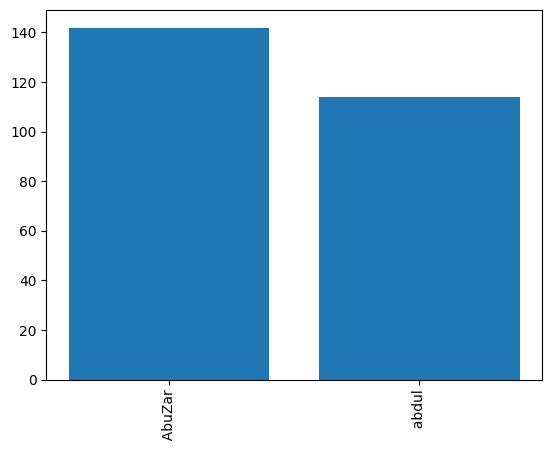

In [30]:
plt.bar(name,count)
plt.xticks(rotation = "vertical")
plt.show()

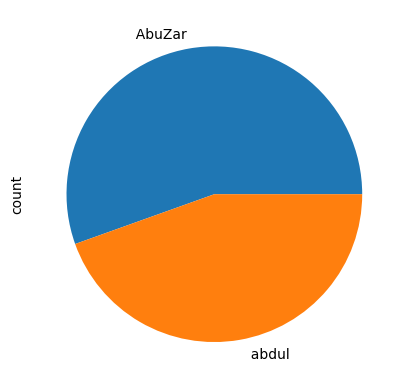

In [31]:
x = ((df["Name"].value_counts().head()/df.shape[0])*100).plot(kind="pie")

In [32]:

round((df["Name"].value_counts().head() / df.shape[0]) * 100, 2).reset_index().rename(columns={"index": "Name", "count": "Percentage"})



,Name,Percentage
0,AbuZar,55.47
1,abdul,44.53


In [33]:
df.head()

,Name,Date,Chat,Month,Day,Year
1,AbuZar,2023-11-10,- AbuZar: https://www.instagram.com/reel/CwpR...,11,10,2023
2,AbuZar,2023-10-17,- AbuZar: https://youtube.com/shorts/SbyrlQy5...,10,17,2023
3,AbuZar,2023-10-21,- AbuZar: https://youtube.com/shorts/yYu23hOm...,10,21,2023
4,AbuZar,2023-10-25,- AbuZar: https://youtube.com/shorts/tHI0hX50...,10,25,2023
5,abdul,2023-10-25,- abdul: Haaaaah\n,10,25,2023


In [34]:
new_chat = []
for i in df["Chat"]:
    new_chat.append(i)

In [35]:
word_count = sum(len(item.split()) for item in new_chat)
word_count

1109

In [36]:
new_chat

[' - AbuZar: https://www.instagram.com/reel/CwpR-gPMv9S/?igshid=MTNhN2IzZGNmYg==\n',
 ' - AbuZar: https://youtube.com/shorts/SbyrlQy53yY?si=GDhWhOK2eJbOEtvi\n',
 ' - AbuZar: https://youtube.com/shorts/yYu23hOmyAI?si=JghsO-5E3vcKyOXW\n',
 ' - AbuZar: https://youtube.com/shorts/tHI0hX50Wss?si=nTfH9hJ8zk_lTm_3\n',
 ' - abdul: Haaaaah\n',
 ' - abdul: 🤣🤣🤣\n',
 ' - AbuZar: <Media omitted>\n',
 ' - AbuZar: https://youtube.com/shorts/JIESg9yN20g?si=UFX5A09LQn5OtLS4\n',
 ' - abdul: Dekh le bete\n',
 ' - AbuZar: Hmm Hafiz je\n',
 ' - AbuZar: Hai pakka\n',
 ' - abdul: 😁😁\n',
 ' - abdul: Kari Abdullaha fail h\n',
 ' - AbuZar: 😂😂\n',
 ' - AbuZar: https://youtube.com/shorts/V-KLPGr_huY?si=q3BOhlFXMcaaN1Rt\n',
 ' - AbuZar: 😂😂\n',
 ' - abdul: 😆😆😆😆\n',
 ' - AbuZar: https://youtube.com/shorts/zXR0_TCLN-o?si=GmawPXENPQ4Rh7IO\n',
 ' - AbuZar: https://youtube.com/shorts/wdijdJt6Ikw?si=O7thcKzc00-njEVo\n',
 ' - AbuZar: https://youtube.com/shorts/ycIzf5oLwe8?si=wzPfx3cFIjMRIWSE\n',
 ' - AbuZar: https://youtu